In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df = pd.read_csv("urbanGB.txt", sep="\t", header=None, names=["coords", "city_label"])


df[["longitude", "latitude"]] = df["coords"].str.split(",", expand=True)


df["longitude"] = df["longitude"].astype(float)
df["latitude"] = df["latitude"].astype(float)


df["scaled_longitude"] = df["longitude"] / 1.7

X = df[["scaled_longitude", "latitude"]].values



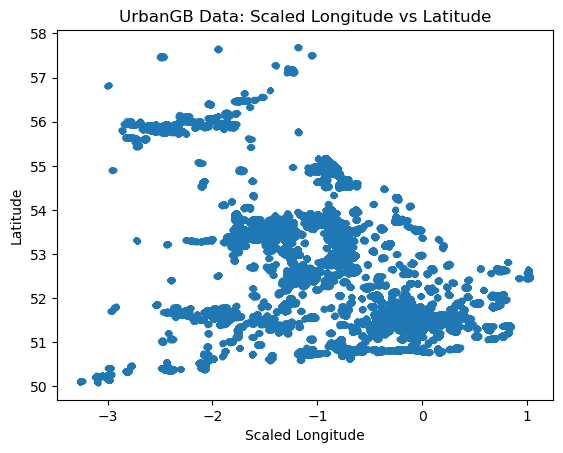

Above is the answer for Question 1


In [11]:
plt.scatter(df["scaled_longitude"], df["latitude"], s=10, alpha=0.5)
plt.title("UrbanGB Data: Scaled Longitude vs Latitude")
plt.xlabel("Scaled Longitude")
plt.ylabel("Latitude")
plt.show()

print("Above is the answer for Question 1")



K = 2
Cluster Centers (scaled): [[-0.52477848 51.64519339]
 [-1.3065074  54.00215403]]
Cluster Sizes: [220254 139923]
Inertia: 371922.8840342327


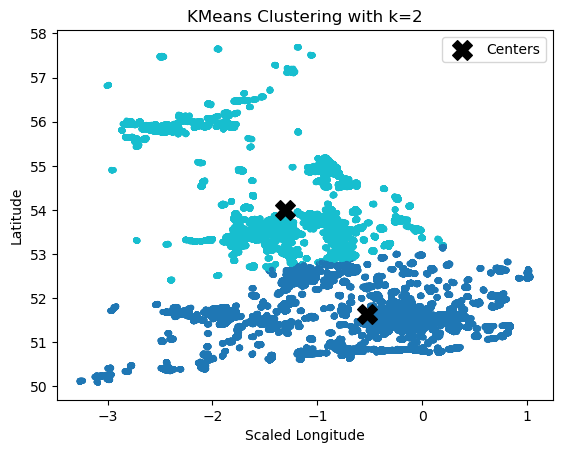


K = 3
Cluster Centers (scaled): [[-0.40965618 51.45249877]
 [-1.71843238 55.53969415]
 [-1.13078347 53.20862625]]
Cluster Sizes: [179762  35362 145053]
Inertia: 230463.16023704002


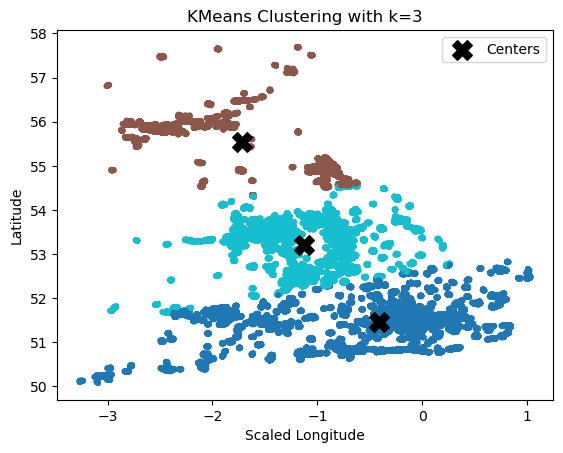


K = 4
Cluster Centers (scaled): [[-0.07495339 51.52977298]
 [-1.12041742 53.25232276]
 [-1.71199997 51.22095098]
 [-1.78745616 55.6151224 ]]
Cluster Sizes: [143390 144670  39150  32967]
Inertia: 145890.03354902472


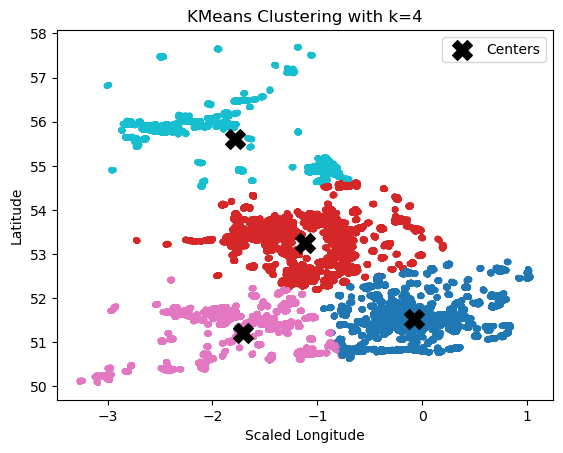


K = 5
Cluster Centers (scaled): [[-0.0622624  51.49962544]
 [-1.19687688 53.62272693]
 [-0.93448591 52.62424347]
 [-1.83699469 55.66218191]
 [-1.71335411 51.17362247]]
Cluster Sizes: [137967  92222  61206  31323  37459]
Inertia: 111076.31719201345


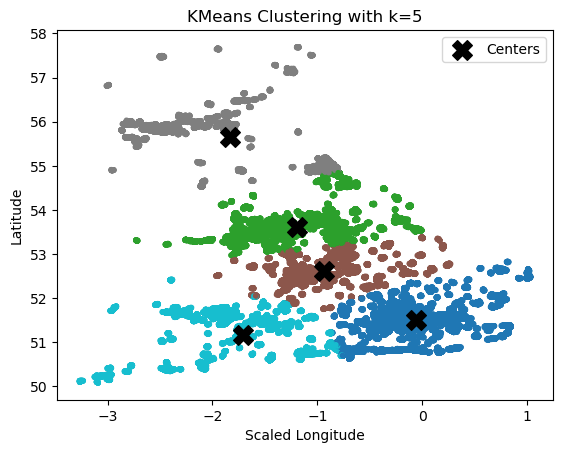


K = 6
Cluster Centers (scaled): [[ 5.46975359e-03  5.15683308e+01]
 [-1.19660229e+00  5.36222753e+01]
 [-9.43098776e-01  5.26127076e+01]
 [-1.83699469e+00  5.56621819e+01]
 [-6.35026798e-01  5.10528308e+01]
 [-1.94852809e+00  5.12187668e+01]]
Cluster Sizes: [117964  92316  61918  31323  28676  27980]
Inertia: 99102.49693728532


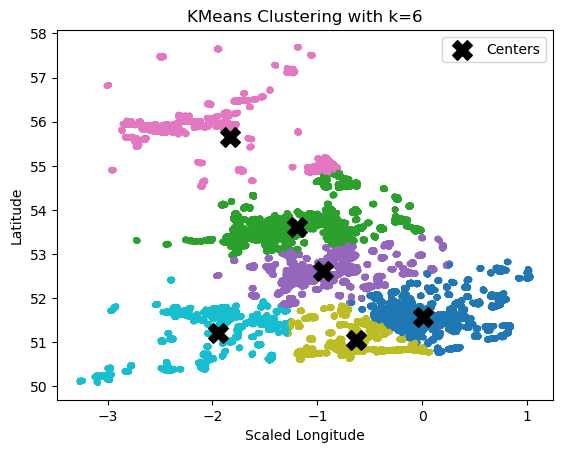

In [8]:
inertias = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    inertias.append(kmeans.inertia_)

    print(f"\nK = {k}")
    print("Cluster Centers (scaled):", kmeans.cluster_centers_)
    print("Cluster Sizes:", np.bincount(kmeans.labels_))
    print("Inertia:", kmeans.inertia_)
    
    # Plot clusters
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="tab10", s=10)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                marker="X", c="black", s=200, label="Centers")
    plt.title(f"KMeans Clustering with k={k}")
    plt.xlabel("Scaled Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()

    print("Above is the answer for Question 2")


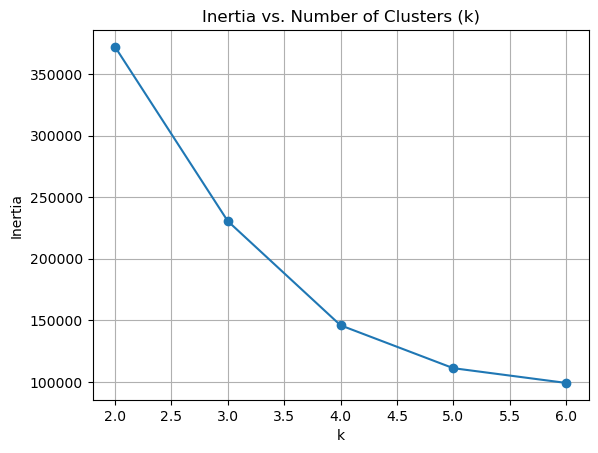

In [9]:
plt.plot(k_values, inertias, marker="o")
plt.title("Inertia vs. Number of Clusters (k)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()
print("Above is the Question 3 answer")
print('/n')
print("Question 4: Based on the Line Graph shown above we can see that the optimal number of Clusters is 3.0. Inertia seems to drop significantly from 2 to 3, but the decrease appears to level off after that. Suggesting that adding more clusters beyond 3 has little to no benefit.")


In [15]:

optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(X)
centers_scaled = kmeans.cluster_centers_
centers_unscaled_long = centers_scaled[:, 0] * 1.7
centers_lat = centers_scaled[:, 1]

print("\nCluster Centers for Google Maps (latitude, longitude):")
for lat, long in zip(centers_lat, centers_unscaled_long):
    print(f"{lat:.5f}, {long:.5f}")

print("Question 5:")
print("Cluster 1 correlates to West of London, near the City of Reading")
print("Cluster 2 correlates to the southern region of Scotland")
print("Cluster 3 correlates to near Manchester in Northern England")



Cluster Centers for Google Maps (latitude, longitude):
51.45250, -0.69642
55.53969, -2.92134
53.20863, -1.92233
Question 5:
Cluster 1 correlates to West of London, near the City of Reading
Cluster 2 correlates to the southern region of Scotland
Cluster 3 correlates to near Manchester in Northern England
